In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
#make rfecv+rf heatmap
df_rf = pd.read_csv('D:/data_hyper_ML/result_n/SI_rf/SI_rf_exclude0.csv')
df_rf

,FI,variable,band1,band2
0,1.888449e-03,2245/2325,2245,2325
1,1.846138e-03,2220/2331,2220,2331
2,1.815398e-03,514/635,514,635
3,1.810880e-03,2100/2400,2100,2400
4,1.808475e-03,545/1446,545,1446
...,...,...,...,...
3238,4.770000e-08,1868/1968,1868,1968
3239,4.370000e-08,1930/2350,1930,2350
3240,4.270000e-08,2036/2327,2036,2327
3241,1.190000e-08,2088/2344,2088,2344


In [84]:
df_rf_em = pd.read_csv('D:/data_hyper_ML/result_n/SI_rf/empty.csv')
df_rf_em = df_rf_em.set_index('index')
df_rf_em.index.name = None
df_rf_em

,400,401,402,403,404,405,406,407,408,409,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
band = df_rf.iloc[:,2:].to_numpy()
for i, j in band:
    x = df_rf[(df_rf['band1']==i) & (df_rf['band2']==j)]
    df_rf_em.iloc[j-400, i-400] = x.iloc[0,0]
df_rf_em.to_csv('D:/data_hyper_ML/result_n/SI_rf/SI_rf_exclude0_hm.csv')

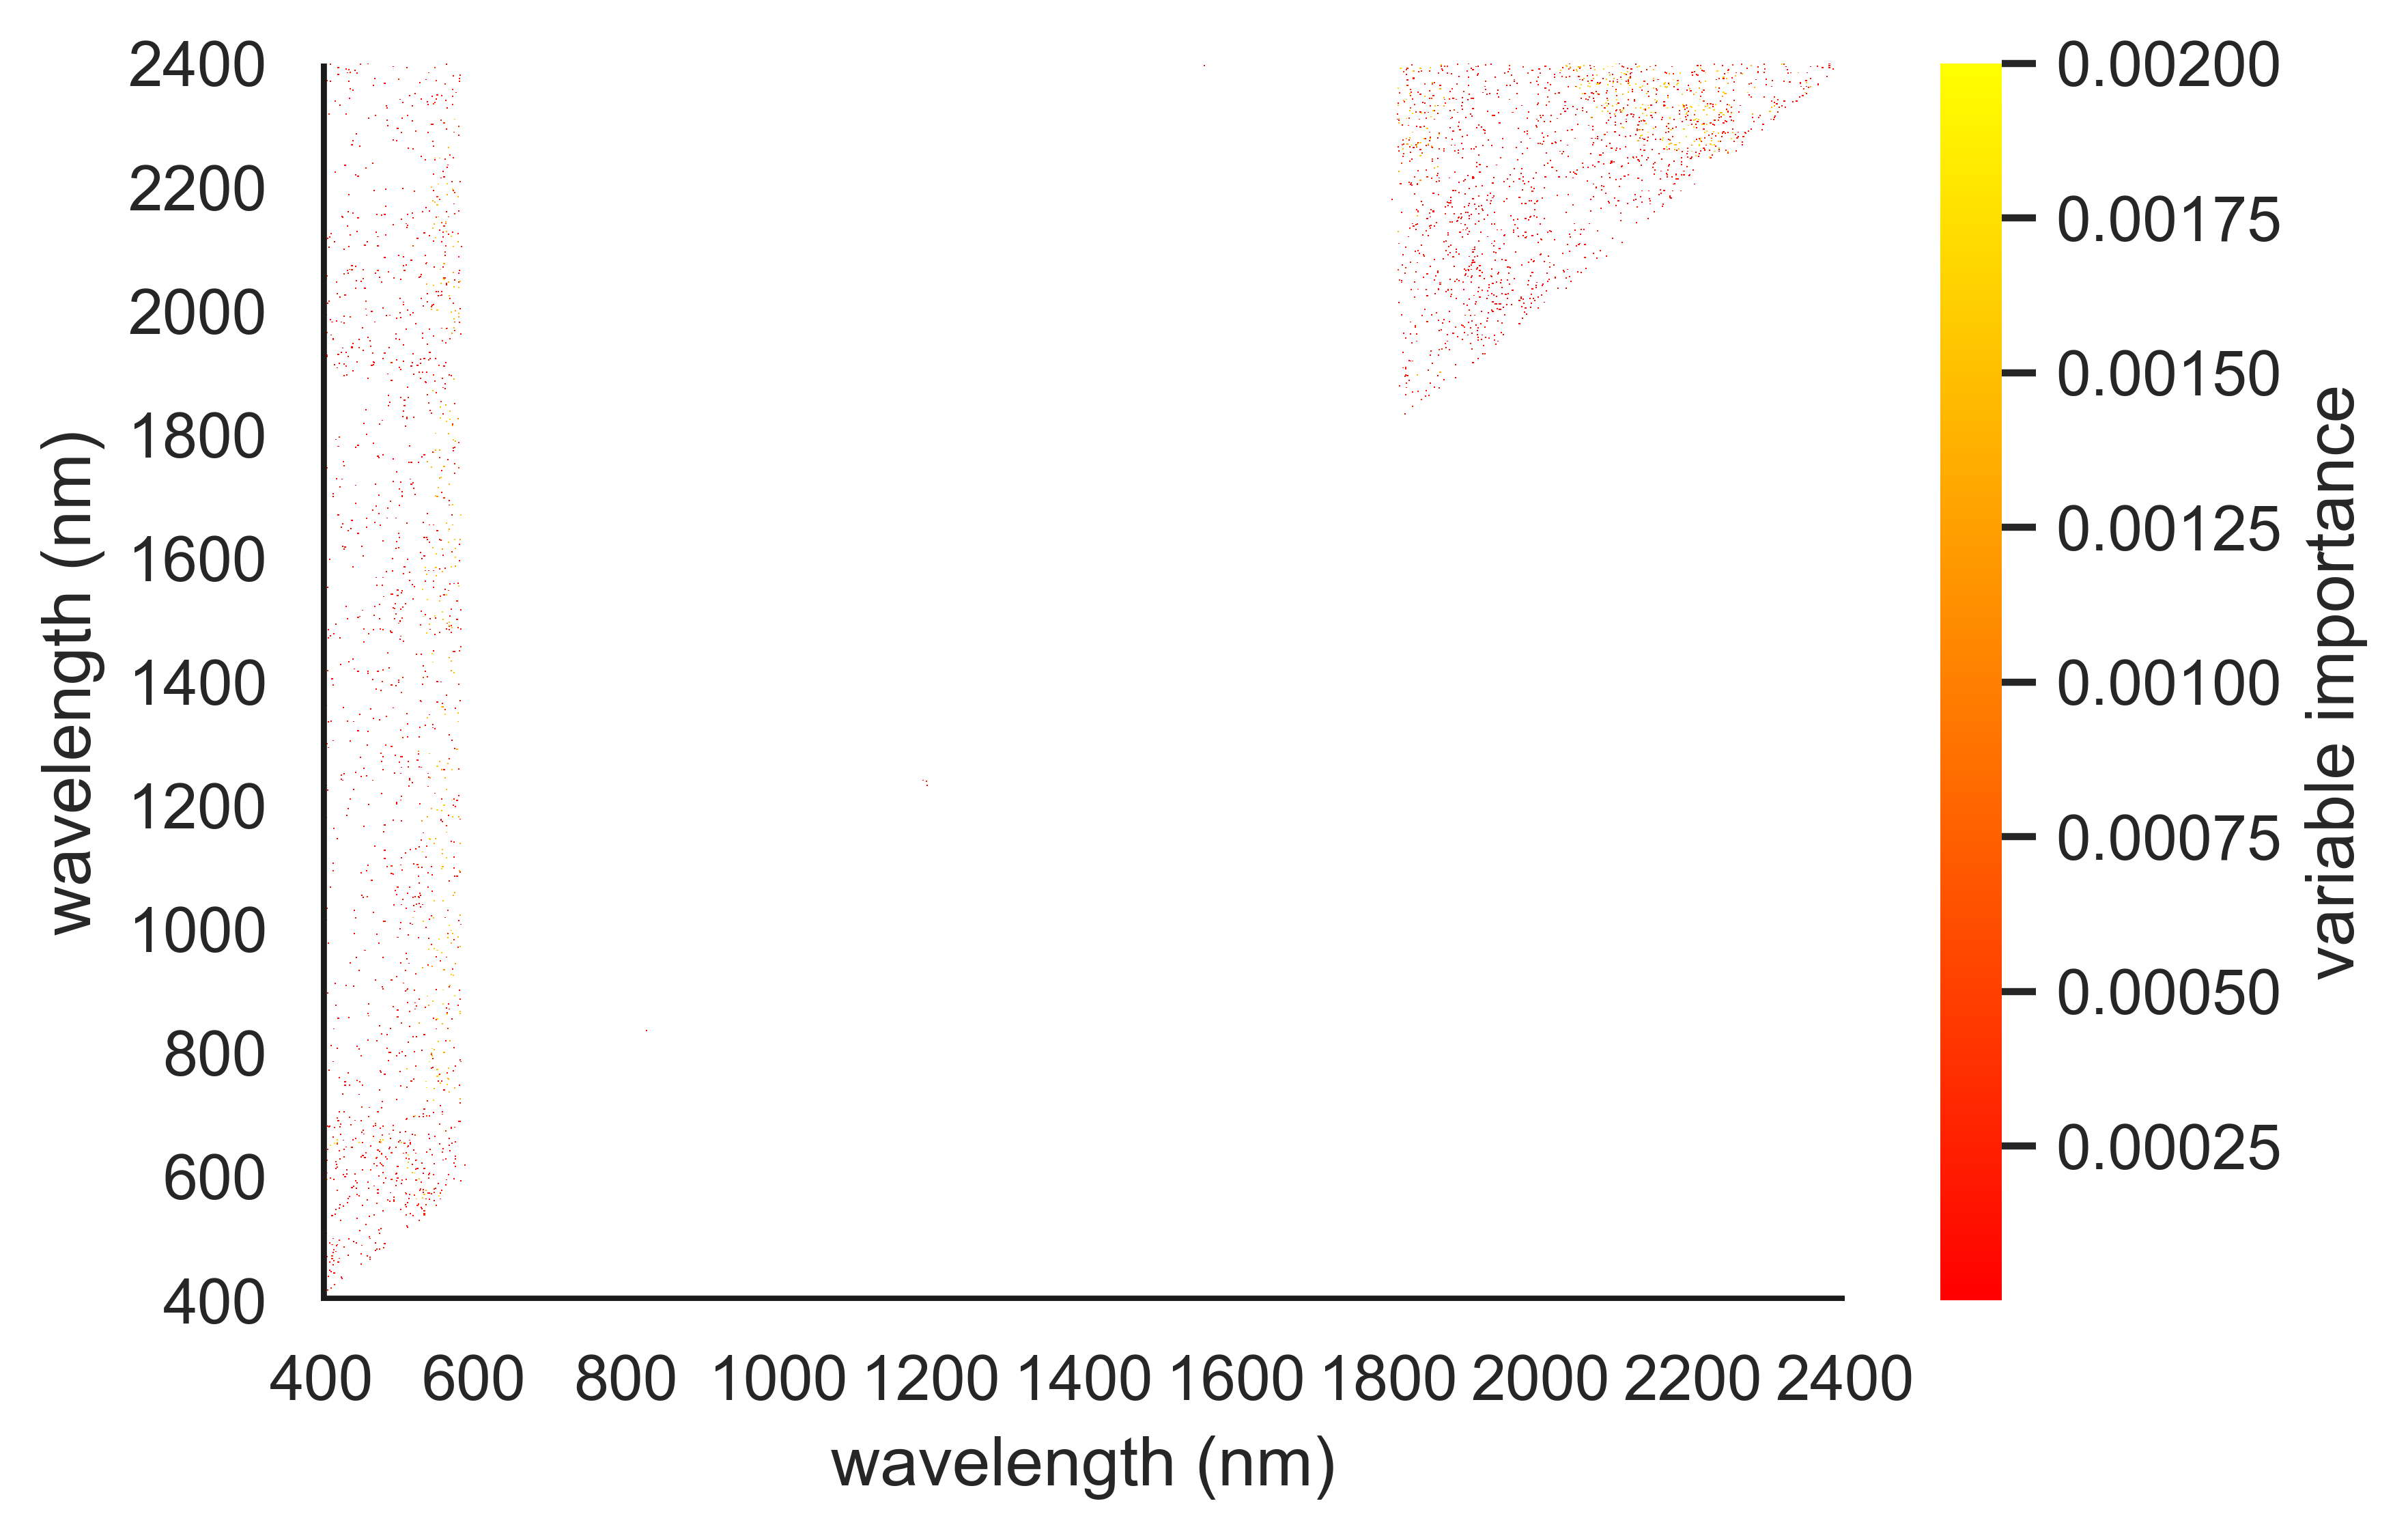

In [93]:
df_rf = pd.read_csv('D:/data_hyper_ML/result_n/SI_rf/SI_rf_exclude0_hm.csv')
df_rf = df_rf.set_index('index')
df_rf.index.name = None
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_style("whitegrid")
hm_rf = sns.heatmap(df_rf, vmin=0.0000000105, vmax=0.002, cmap= 'autumn', cbar_kws={
    'label': 'variable importance'}, xticklabels=200, yticklabels=200)
hm_rf.invert_yaxis()
hm_rf.axhline(y = 0, color = 'k', linewidth = 2)
hm_rf.axvline(x = 0, color = 'k', linewidth = 2)
plt.yticks(rotation=0) 
plt.xlabel('wavelength (nm)') 
plt.ylabel('wavelength (nm)') 
plt.savefig('D:/data_hyper_ML/result_n/SI_rf/hm_rf.png', dpi=600)
plt.show()

In [3]:
#make rfecv+svr heatmap
df_svr = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/SI_svr.csv')
df_svr

,Unnamed: 0,coef,variable,band1,band2
0,0.113310,0.113310,400/401,400,401
1,0.093583,0.093583,400/403,400,403
2,0.086179,0.086179,400/404,400,404
3,0.102930,0.102930,400/407,400,407
4,0.103115,0.103115,400/409,400,409
...,...,...,...,...,...
20005,-0.001560,0.001560,2396/2399,2396,2399
20006,0.016843,0.016843,2397/2398,2397,2398
20007,-0.031555,0.031555,2397/2399,2397,2399
20008,-0.068809,0.068809,2398/2399,2398,2399


In [4]:
df_svr_em = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/empty.csv')
df_svr_em = df_svr_em.set_index('index')
df_svr_em.index.name = None
df_svr_em

,400,401,402,403,404,405,406,407,408,409,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
band = df_svr.iloc[:,3:].to_numpy()
for i, j in band:
    x = df_svr[(df_svr['band1']==i) & (df_svr['band2']==j)]
    df_svr_em.iloc[j-400, i-400] = x.iloc[0,0]
df_svr_em.to_csv('D:/data_hyper_ML/result_n/heatmap/SI_svr_hm.csv')

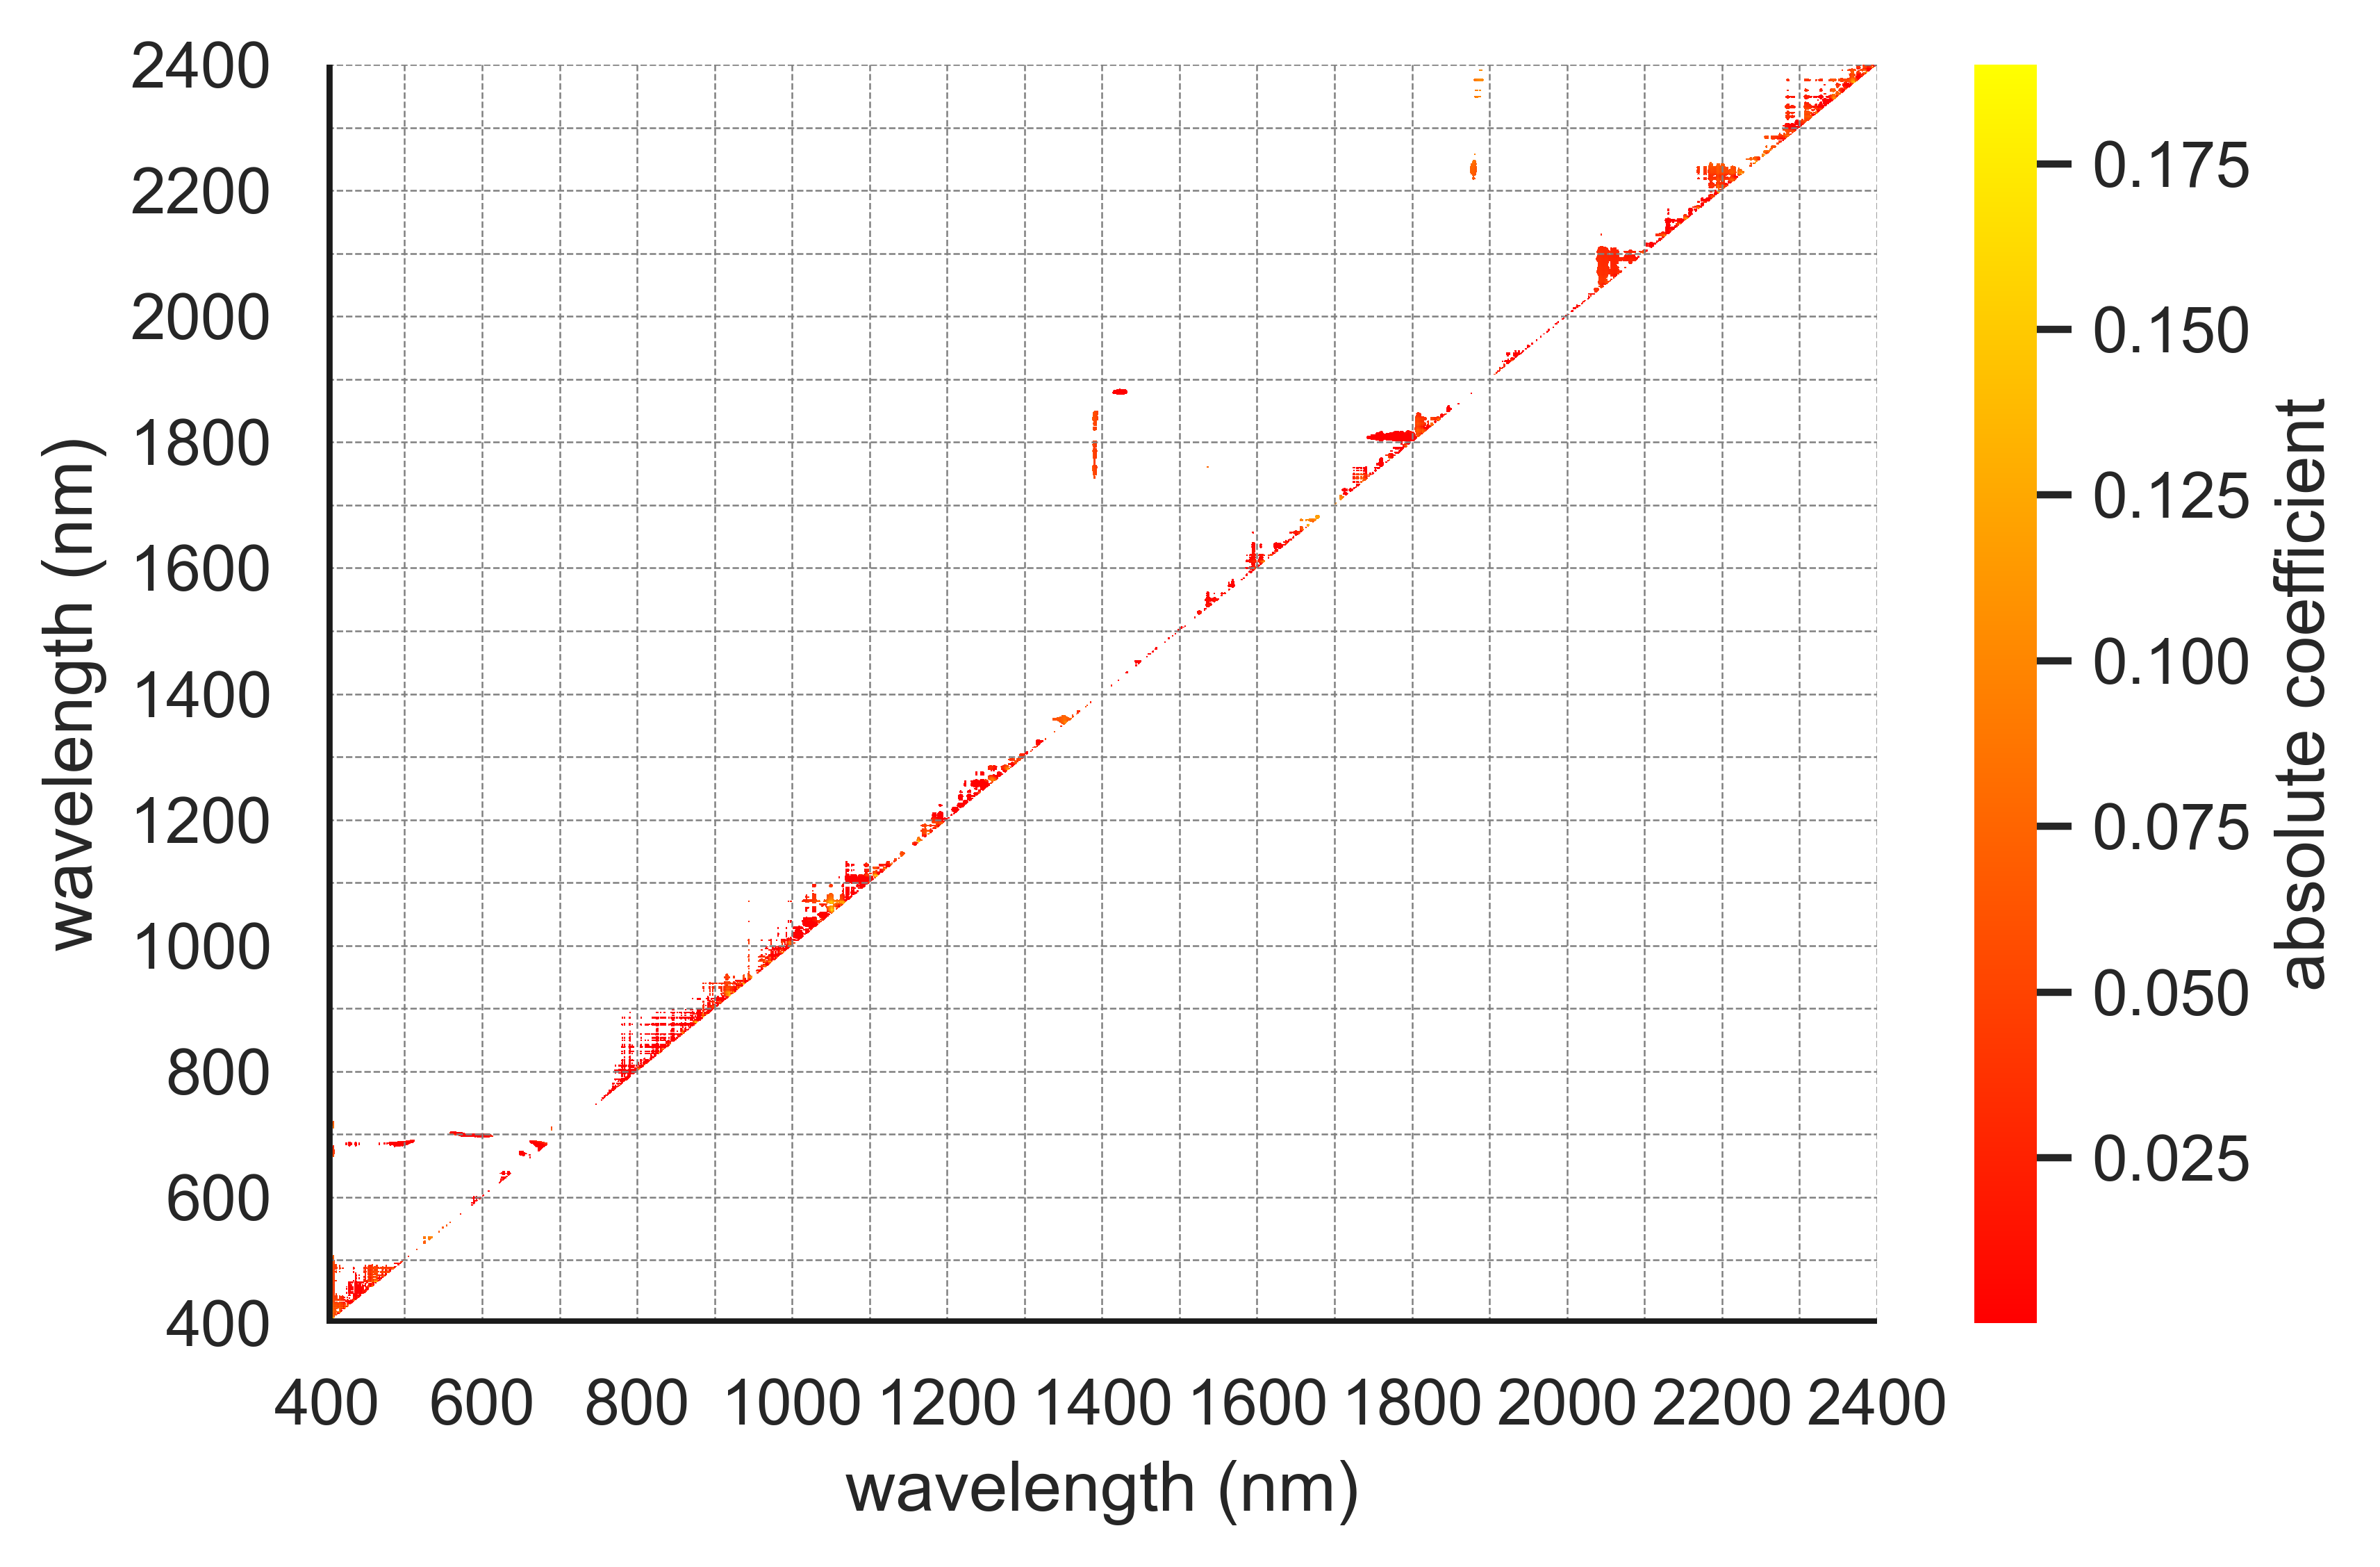

In [8]:
df_svr = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/SI_svr_hm.csv')
df_svr = df_svr.set_index('index')
df_svr.index.name = None
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_style("whitegrid")
hm_svr = sns.heatmap(df_svr, vmin=0.00000268, vmax=0.19, cmap= 'autumn', cbar_kws={
    'label': 'absolute coefficient'}, xticklabels=200, yticklabels=200)
hm_svr.invert_yaxis()
hm_svr.axhline(y = 0, color = 'k', linewidth = 2)
hm_svr.axvline(x = 0, color = 'k', linewidth = 2)
plt.yticks(rotation=0) 
plt.xlabel('wavelength (nm)') 
plt.ylabel('wavelength (nm)')
h = hm_svr.get_yticks()
h1 = [(i+(i+200))/2 for i in h]
h_c = np.concatenate((h, h1), axis=None)
w = hm_svr.get_xticks()
w1 = [(i+(i+200))/2 for i in w]
w_c = np.concatenate((w, w1), axis=None)
hm_svr.hlines(h_c,w[0],w[-1], linestyles='dashed', linewidth=0.3, colors='gray')
hm_svr.vlines(w_c,h[0],h[-1], linestyles='dashed', linewidth=0.3, colors='gray')
plt.savefig('D:/data_hyper_ML/result_n/heatmap/hm_svr_gridline.png', dpi=600)
plt.show()

In [103]:
#make plsr heatmap
df1 = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/plsr_VIP1.csv')
df2 = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/plsr_VIP2.csv')
df_plsr = pd.concat([df1, df2], axis=0, sort=False)
df_plsr

,VIP,band1,band2
0,1.423745,401,400
1,1.846025,402,400
2,1.846459,403,400
3,1.641617,404,400
4,1.344293,405,400
...,...,...,...
979294,0.988230,2399,2397
979295,0.806841,2400,2397
979296,1.293837,2399,2398
979297,0.804332,2400,2398


In [104]:
df_plsr_em = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/empty.csv')
df_plsr_em = df_plsr_em.set_index('index')
df_plsr_em

,400,401,402,403,404,405,406,407,408,409,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
index,,,,,,,,,,,,,,,,,,,,,
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
band = df_plsr.iloc[:,1:].to_numpy()
for i, j in band:
    x = df_plsr[(df_plsr['band1']==i) & (df_plsr['band2']==j)]
    df_plsr_em.iloc[j-400, i-400] = x.iloc[0,0]
df_plsr_em.to_csv('D:/data_hyper_ML/result_n/heatmap/SI_olsr_hm.csv')

KeyboardInterrupt: 

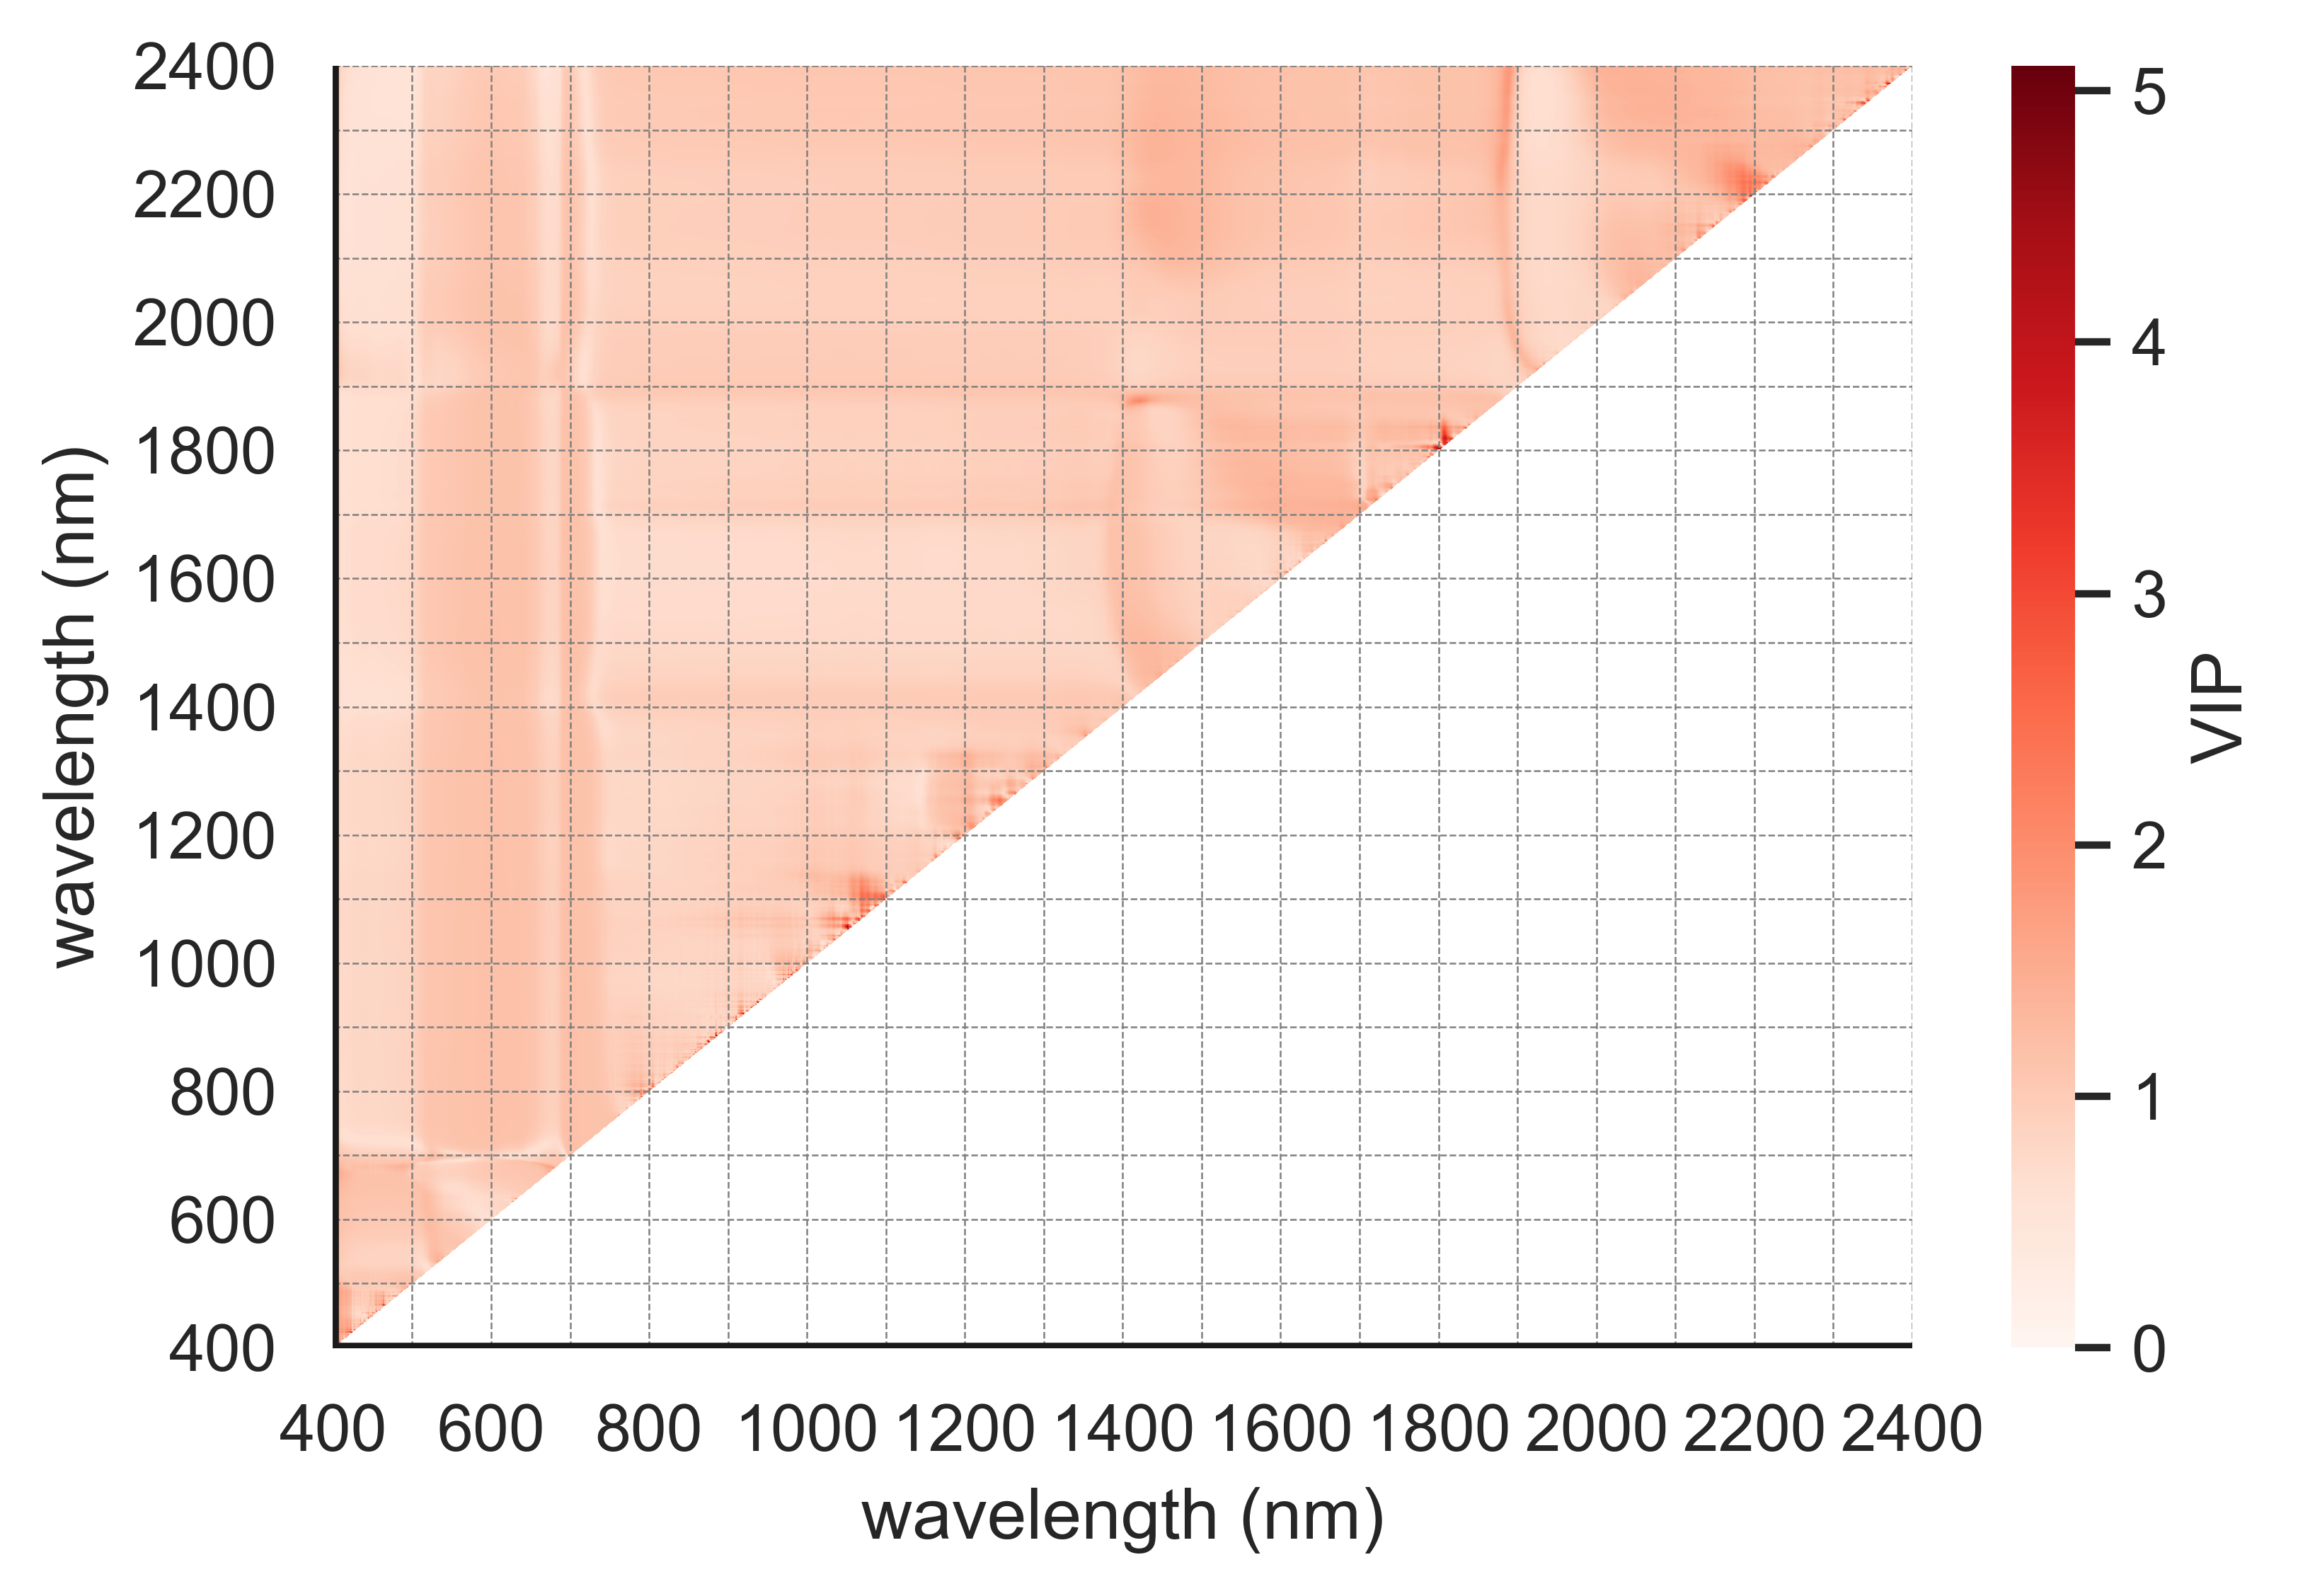

In [41]:
df_plsr = pd.read_csv('D:/data_hyper_ML/result_n/heatmap/plsr_VIP.csv')
df_plsr = df_plsr.set_index('index')
df_plsr.index.name = None
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_style("whitegrid")
hm_plsr = sns.heatmap(df_plsr, vmin=0, vmax=5.1, cmap= 'Reds', cbar_kws={
    'label': 'VIP'}, xticklabels=200, yticklabels=200)
hm_plsr.invert_yaxis()
hm_plsr.axhline(y = 0, color = 'k', linewidth = 2)
hm_plsr.axvline(x = 0, color = 'k', linewidth = 2)
plt.yticks(rotation=0) 
plt.xlabel('wavelength (nm)') 
plt.ylabel('wavelength (nm)') 
h = hm_svr.get_yticks()
h1 = [(i+(i+200))/2 for i in h]
h_c = np.concatenate((h, h1), axis=None)
w = hm_svr.get_xticks()
w1 = [(i+(i+200))/2 for i in w]
w_c = np.concatenate((w, w1), axis=None)
hm_plsr.hlines(h_c,w[0],w[-1], linestyles='dashed', linewidth=0.3, colors='gray')
hm_plsr.vlines(w_c,h[0],h[-1], linestyles='dashed', linewidth=0.3, colors='gray')
plt.savefig('D:/data_hyper_ML/result_n/heatmap/hm_plsr_gridline.png', dpi=600)
plt.show()

In [6]:
#make spear heatmap
df1 = pd.read_csv('D:/PhDdata/result/heatmap/spear1.csv')
df2 = pd.read_csv('D:/PhDdata/result/heatmap/spear2.csv')
df_spear = pd.concat([df1, df2], axis=0, sort=False)
df_spear

,rho,band1,band2
0,0.591994,401,400
1,0.670184,402,400
2,0.680035,403,400
3,0.627099,404,400
4,0.599477,405,400
...,...,...,...
979295,0.385221,2399,2397
979296,0.425149,2400,2397
979297,0.330971,2399,2398
979298,0.348567,2400,2398


In [7]:
df_spear_em = pd.read_csv('D:/PhDdata/result/heatmap/empty.csv')
df_spear_em = df_spear_em.set_index('index')
df_spear_em

,Unnamed: 1
index,
400,400
401,401
402,402
403,403
404,404
...,...
2396,2396
2397,2397
2398,2398


In [8]:
group_spear = df_spear.groupby(df_spear['band2'])
mylist_spear = list(dict.fromkeys(df_spear['band2'].tolist()))
for i in mylist_plsr:
    groups_spear = group_spear.get_group(i)
    groups_spear =  groups_spear.set_index('band1')
    groups_spear.index.name = None
    df_spear_em = pd.concat([df_spear_em,  groups_spear.iloc[:,0]], axis=1)
df_spear_em.to_csv('D:/PhDdata/result/heatmap/spear.csv')

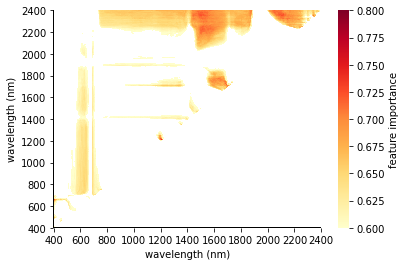

In [4]:
df_spear = pd.read_csv('PhDdata/result_n/heatmap/spear.csv')
df_spear = df_spear.set_index('index')
df_spear.index.name = None
df_spear = df_spear[df_spear>0.6]
hm_spear = sns.heatmap(df_spear, vmin=0.6, vmax=0.8, center= 0.7, cmap= 'YlOrRd', 
            cbar_kws={'label': 'feature importance'}, xticklabels=200, yticklabels=200)
hm_spear.invert_yaxis()
hm_spear.axhline(y = 0, color = 'k', linewidth = 2)
hm_spear.axvline(x = 0, color = 'k', linewidth = 2)
plt.yticks(rotation=0) 
plt.xlabel('wavelength (nm)') 
plt.ylabel('wavelength (nm)') 
plt.savefig('PhDdata/result_n/heatmap/hm_spear1.png')
plt.show()

In [52]:
group_rf = df_rf.groupby(df_rf['band1'])
mylist_rf = list(dict.fromkeys(df_rf['band1'].tolist()))
for i in mylist_rf:
    groups_rf = group_rf.get_group(i)
    groups_rf = groups_rf.set_index('band2')
    groups_rf.index.name = None
    df_rf_em = pd.concat([df_rf_em,  groups_rf.iloc[:,0]], axis=1)
df_rf_em.to_csv('H:/result_n/SI_rf/SI_rf_hm.csv')

In [21]:
#compute VIF for CR group
VIF_CR = pd.DataFrame()
df_CR = pd.read_csv('D:/PhDdata/CR.csv')
df_CR_T = df_CR.iloc[:,1:].transpose()
df_CR_T.columns = list(df_CR['No'])
df_CR_T.insert(loc=2, column='No', value=range(85))
df_CR_VIF = df_CR_T[df_CR_T.columns[3:].tolist()]
VIF_CR['VIF'] = [variance_inflation_factor(df_CR_VIF.values, i) for i in range(df_CR_VIF.shape[1])]
VIF_CR['variable'] = df_CR_T.columns[3:].tolist()
VIF_CR.sort_values('VIF', ascending=False)
#df_VIF = df_im[feature_der_pear.index.tolist()]
#df_VIF = df_VIF.loc[:, df_VIF.columns != '1706_1','1709_1']
#variable.remove('1706_1','1709_1')
#VIF['variable'] = feature_der_pear.index.tolist()

,VIF,variable
24,8.823773e+06,position1925
19,5.998843e+06,position1440
14,3.806298e+06,position1175
15,5.402138e+05,depth1440
9,5.062862e+05,position970
21,4.867617e+05,area1925
16,4.847162e+05,area1440
20,4.711525e+05,depth1925
4,2.991375e+05,position670
22,2.275030e+05,FWHM1925


In [23]:
#compute VIF for der2 group
VIF_der2 = pd.DataFrame()
df_der2 = pd.read_csv('D:/PhDdata/derivative2.csv')
df_der2_T = df_der2.iloc[:,1:].transpose()
df_der2_T.columns = list(df_der2['No'])
df_der2_T.insert(loc=2, column='No', value=range(85))
df_der2_VIF = df_der2_T[df_der2_T.columns[3:].tolist()]
VIF_der2['VIF'] = [variance_inflation_factor(df_der2_VIF.values, i) for i in range(df_der2_VIF.shape[1])]
VIF_der2['variable'] = df_der2_T.columns[3:].tolist()
VIF_der2.sort_values('VIF', ascending=False)

c:\users\belif\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,inf,400
1330,inf,1730
1343,inf,1743
1342,inf,1742
1341,inf,1741
...,...,...
662,inf,1062
661,inf,1061
660,inf,1060
659,inf,1059
